In [1]:
import os

using_colab = False
if using_colab:
  os.system('rm -rf ./*')
  os.system('git clone https://github.com/gasparyanartur/radio-optimizer.git')
  os.system('mv radio-optimizer/* ./')
  os.system('rm -rf radio-optimizer')

EFIM
[[  2636.47658135   -898.98146586   4625.09226413 -14790.42549925]
 [  -898.98146586    306.5332276   -1577.0563838    5043.21505834]
 [  4625.09226413  -1577.0563838    8113.6614689  -25946.40249937]
 [-14790.42549925   5043.21505834 -25946.40249937  82973.11950224]]
CRLB
[[ 3.79294095e-04 -1.11236999e-03  2.16211903e-04 -6.76113071e-05]
 [-1.11236999e-03  3.26228908e-03 -6.34092738e-04  1.98286210e-04]
 [ 2.16211903e-04 -6.34092738e-04  1.23248918e-04 -3.85409885e-05]
 [-6.76113071e-05  1.98286210e-04 -3.85409885e-05  1.20520960e-05]]
PWM: PEB = 0.06135822756872842 | CEB = 0.0034716128787623157
self.L
4
point
[2 4]
L1
[[-3 -1]
 [ 2  2]]
L2
[[0. 2.]
 [0. 4.]]
point
[2 4]
L1
[[3.  1.5]
 [2.  4. ]]
L2
[[0. 2.]
 [0. 4.]]
point
[2 4]
L1
[[-3 -1]
 [ 2  2]]
L2
[[-5.01  2.  ]
 [ 2.    4.  ]]
point
[2 4]
L1
[[3.  1.5]
 [2.  4. ]]
L2
[[-5.01  2.  ]
 [ 2.    4.  ]]
point
[2 4]
L1
[[-3 -1]
 [ 2  2]]
L2
[[-1.    2.  ]
 [ 5.01  4.  ]]
point
[2 4]
L1
[[3.  1.5]
 [2.  4. ]]
L2
[[-1.    2.  ]
 [

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

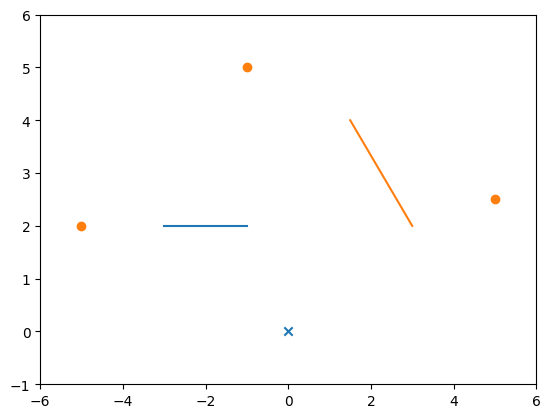

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from src.utils import db2pow

from src.channel_mmWave_parameters import ChannelmmWaveParameters

c = ChannelmmWaveParameters(
    OB = np.array([45, 0, 0]).reshape(-1, 1),
    NB_dim = np.array([1, 1]).reshape(-1, 1),
    PR = np.array([[-5.01, 2, 0.5], [-1, 5.01, 0.5], [5.01, 2.5, 0.5]]).T,
    OR = np.array([[0, 0, 0], [-90, 0, 0], [180, 0, 0]]).T,
    NR_dim = np.array([[10, 10], [10, 10], [10, 10]]).T,
    PU = np.array([-2, 3, -1.5]).reshape(-1, 1),
    OU = np.array([0, 0, 0]).reshape(-1, 1),
    NU_dim = np.array([1, 1]).reshape(-1, 1),
    P = db2pow(15),
    K = 64,
    G = 10,

    seed=1
)

c.get_beam_matrix()
c.get_tx_symbol()
c.get_path_parameters_PWM()
c.get_FIM_PWM()

fim = c.FIM
c.get_crlb_from_fim_PWM(fim)
print(f"PWM: PEB = {c.PEB} | CEB = {c.CEB}")



In [ ]:
c.Anchor = np.hstack((c.PB[:2], c.PR[:2]))
c.Wall = [np.array([[-3, 2], [-1, 2]]), np.array([[3, 2], [1.5, 4]])]

plt.scatter(c.PB[0], c.PB[1], marker='x')
plt.scatter(c.PR[0], c.PR[1], marker='o')
plt.plot(c.Wall[0][:, 0], c.Wall[0][:, 1])
plt.plot(c.Wall[1][:, 0], c.Wall[1][:, 1])
plt.xlim(-6, 6)
plt.ylim(-1, 6)

point = np.array([2, 4])
blockage = c.get_blockage(point)
c.get_crlb_blockage(blockage)

print(f"PWM: PEB = {c.PEB} | CEB = {c.CEB}")


In [4]:
c.thetaRU_loc[:, 2]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
c.lambdak

In [5]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [2]:
import numpy as np
np.random.seed(1)
from src.utils import rand

rand(2, 1)

array([[0.417022  ],
       [0.72032449]])